In [8]:
import glob
import re
import xarray as xr
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
P_level_13 = [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]
input_vars = [
    "u_component_of_wind", "v_component_of_wind", "geopotential", "2m_temperature",
    "mean_sea_level_pressure", "10m_u_component_of_wind", "10m_v_component_of_wind",
    "total_precipitation_6hr", "vertical_velocity", "sea_surface_temperature", "total_cloud_cover"
]
start = pd.Timestamp(year=2020, month=1, day=1)
end   = pd.Timestamp(year=2020, month=1, day=31, hour=18)
# Load the ERA5 daily dataset once
print("Opening ERA5 daily dataset...")
ERA5 = xr.open_zarr(
    "gs://weatherbench2/datasets/era5/1959-2023_01_10-6h-240x121_equiangular_with_poles_conservative.zarr"
).sel(level=P_level_13)[input_vars].sel(time=slice(start, end))#


ERA5#.resample(time="1D").mean()


# Difference

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

plt.figure(figsize=(8, 6))



colors = sns.color_palette('viridis', 40)
models = sns.color_palette("hls", 6)


S2S = False
GenCast = False
GenCast_mini = True
GraphCast = False
HRES = False
ENS = False
CESM2 = False
CSEM2_hires = False
ERA5 = False


##################
# CESM2_hires
##################
if CSEM2_hires:
    data = xr.open_dataset("/geodata2/Gencast/CESM2/hires/spectra_uv.nc").isel(level=5)
    colors = sns.color_palette('viridis', 12)
    for t in range(0,12):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t) - spc.isel(time=0)
        valid_indices = np.where(np.isfinite(spc))
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

##################
# CESM2
##################
if CESM2:
    data = xr.open_dataset("/geodata2/Gencast/CESM2/1990_daily_spectra_uv.nc").isel(level=5)
    colors = sns.color_palette('viridis', 365)
    for t in range(0,365,5):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t) - spc.isel(time=0)
        valid_indices = np.where(np.isfinite(spc))
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

##################
# ERA5
##################
if ERA5:
    data = xr.open_dataset("/geodata2/Gencast/CESM2/1990_daily_spectra_uv.nc").mean("level")
    colors = sns.color_palette('viridis', 365)
    for t in range(0,365,5):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t) - spc.isel(time=0)
        valid_indices = np.where(np.isfinite(spc))
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

##################
# S2S
##################
if S2S:
    data = xr.open_zarr("/data/GC_output/analysis/NWP/S2S/2021/spectra.zarr").sel(level=300).mean("initial_time").mean("ensemble")
    colors = sns.color_palette('viridis', 31)
    for t in range(0, 31):
        x = data['wavenumber']
        spc = data['spectrum'].isel(time=t) - data['spectrum'].isel(time=0)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

##################
# GenCast
##################
if GenCast:
    data = xr.open_zarr("/geodata2/Gencast/output_spectra.zarr").mean("initial_time").mean("ensemble")
    input = xr.open_dataset("/geodata2/S2S/DL/GC_input/2021/spectra.nc")['spectrum'].mean("initial_time")
    colors = sns.color_palette('viridis', 30)
    for t in range(0, 30):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t) - input.isel(time=0)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])
        plt.plot(x[1:], input.isel(time=0)[1:] - input.isel(time=0)[1:], color=colors[0])

##################
# GenCast_MINI
##################
if GenCast_mini:
    data = xr.open_dataset("/geodata2/Gencast/spectra_mini.nc").mean("initial_time").mean("ensemble")
    input = xr.open_zarr("/geodata2/Gencast/input/2021/spectra.zarr")['spectrum'].mean("initial_time")
    colors = sns.color_palette('viridis', 30)
    for t in range(0, 30):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t) - input.isel(time=0)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])
        # plt.plot(x[1:], input.isel(time=0)[1:] - input.isel(time=0)[1:], color=colors[0])


##################
# GraphCast
##################
if GraphCast:
    data = xr.open_zarr(f"/geodata2/S2S/DL/GC_output/2021/spectra.zarr")
    input = xr.open_zarr(f"/geodata2/S2S/DL/GC_input/2021/spectra.zarr")['spectrum'].mean("initial_time")
    colors = sns.color_palette('viridis', 60)
    for t in range(0, 60):
        x = data['wavenumber']
        spc = data['spectrum'].mean("initial_time")
        spc = spc.isel(time=t) - input.isel(time=1)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])
        plt.plot(x[1:], input.isel(time=0)[1:] - input.isel(time=0)[1:], color=colors[0])

##################
# IFS-HRES
##################
if HRES:
    data = xr.open_zarr(f"/data/GC_output/analysis/NWP/IFS-HRES/2021/spectra.zarr")
    colors = sns.color_palette('viridis', 41)
    for t in range(0, 41):
        x = data['wavenumber']
        spc = data['spectrum'].mean("initial_time")
        spc = spc.isel(time=t) - spc.isel(time=0)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

##################
# IFS-ENS
##################
if ENS:
    data = xr.open_zarr("/geodata2/S2S/DL/GC_output/IFS-ENS/spectra.zarr").sel(level=300).mean("initial_time").mean("ensemble")
    colors = sns.color_palette('viridis', 31)
    for t in range(0, 31):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t) - spc.isel(time=0)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

# 1. 400km 파장에 해당하는 wavenumber에 수직선 추가
# zonal wavenumber index at wavelength 400km

# k = 2 * pi * circumference / wavelength
k_400 = 2*np.pi * 6371229/400000


plt.axvline(x=k_400, color='k', linestyle='--', label='400 km wavelength')

k_min = x[1].item()
k_max = x[-1].item()
k_vals = np.logspace(np.log10(k_min), np.log10(k_max), 100)

y_ref = 1e-3

A_5_3 = y_ref / (k_400 ** (-5/3))
trend_5_3 = A_5_3 * k_vals ** (-5/3)

A_3 = y_ref / (k_400 ** (-3))
trend_3 = A_3 * k_vals ** (-3)

# plt.loglog(k_vals[:], trend_5_3[:], 'g--', label=r'$k^{-5/3}$', alpha=0.5)
# plt.loglog(k_vals[:], trend_3[:], 'y--', label=r'$k^{-3}$', alpha=0.5)

plt.xlabel('Zonal Wavenumber')
plt.ylabel('Spectral Density')
# plt.title('GenCast Kinetic Energy Spectrum\n 2021, 52 week-average\n12-hourly, 20 days')
plt.legend()
plt.xscale('log')
plt.yscale("symlog", linthresh=1e-3)
plt.grid(True, which='both', ls='--')
# plt.ylim(1e-4, 1e3)
plt.tight_layout()
# plt.show()
plt.savefig("GenCast Mini KE diff.png")


# Raw KE

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

plt.figure(figsize=(8, 6))



colors = sns.color_palette('viridis', 40)
models = sns.color_palette("hls", 6)

S2S = False
GenCast = True
GraphCast = False
HRES = False
ENS = False
CESM2 = False
CESM2_hires = False
ERA5 = False

###################
# S2S
###################
if S2S:
    data = xr.open_zarr("/data/GC_output/analysis/NWP/S2S/2021/spectra.zarr").sel(level=300).mean("initial_time").mean("ensemble")
    x = data['wavenumber']
    colors = sns.color_palette('viridis', 31)
    for t in range(0, 31):
        spc = data['spectrum'].isel(time=t)# - data['spectrum'].isel(time=0)
        plt.loglog(x[1:], spc[1:], color=colors[t])


###################
# GenCast
###################
if GenCast:
    data = xr.open_zarr("/geodata2/Gencast/output_spectra.zarr").mean("initial_time").mean("ensemble")
    colors = sns.color_palette('viridis', 30)
    for t in range(0, 30):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t)# - input.isel(time=0)
        plt.loglog(x[1:], spc[1:], color=colors[t], linewidth=1)
        
##################
# GraphCast
##################
if GraphCast:
    data = xr.open_zarr("/geodata2/S2S/DL/GC_output/2021/spectra.zarr").mean("initial_time")
    colors = sns.color_palette('viridis', 60)
    for t in range(0, 60, 2):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t)
        plt.loglog(x[1:], spc[1:], color=colors[t], alpha = (t+40)/120, linewidth=0.8)


##################
# IFS-HRES
##################
if HRES:
    HRES = xr.open_zarr("/data/GC_output/analysis/NWP/IFS-HRES/2021/spectra.zarr").mean("initial_time")
    colors = sns.color_palette('viridis', 41)
    for t in range(0, 41):
        x = HRES['wavenumber']
        spc = HRES['spectrum']
        spc = spc.isel(time=t)
        plt.loglog(x[1:], spc[1:], color=colors[t])

##################
# IFS-ENS
##################
if ENS:
    data = xr.open_zarr("/geodata2/S2S/DL/GC_output/IFS-ENS/spectra.zarr").mean("initial_time").mean("ensemble").sel(level=300)
    colors = sns.color_palette('rocket', 31)
    for t in range(0, 31):
        x = data['wavenumber']
        spc = data['spectrum'].isel(time=t)
        plt.loglog(x[1:], spc[1:], color=colors[t], linewidth=0.8)

##################
# CESM2
##################
if CESM2:
    data = xr.open_dataset("/geodata2/Gencast/CESM2/1990_daily_spectra_uv.nc").mean("level")#.isel(level=5)
    
    x = data['wavenumber']
    spc = data['spectrum'].mean("time")
    std = data['spectrum'].std("time")
    
    plt.plot(x[1:], spc[1:], color="black", label="CESM2")
    
    lower_bound = np.maximum(spc[1:] - std[1:], 1e-10) 
    upper_bound = spc[1:] + std[1:]
    plt.fill_between(x[1:], lower_bound, upper_bound, color="blue", alpha=0.3)

##################
# CESM2-hires
##################
if CESM2_hires:
    data = xr.open_dataset("/geodata2/Gencast/CESM2/hires/spectra_uv.nc").isel(level=5)
    
    x = data['wavenumber']
    spc = data['spectrum'].mean("time")
    std = data['spectrum'].std("time")
    
    plt.plot(x[1:], spc[1:], color="black", label="CESM2")
    
    lower_bound = np.maximum(spc[1:] - std[1:], 1e-7) 
    upper_bound = spc[1:] + std[1:]
    plt.fill_between(x[1:], lower_bound, upper_bound, color="blue", alpha=0.3)



##################
# ERA5
##################
if ERA5:
    input = xr.open_dataset("/geodata2/Gencast/input/2021-0.25/spectra.nc")["spectrum"].mean("initial_time").isel(time=1)
    x = input['wavenumber']
    plt.loglog(x[1:], input[1:], color="red", label="ERA5", linewidth=0.8)


# k = 2 * pi * circumference / wavelength
k_400 = 2*np.pi * 6371229/400000


plt.axvline(x=k_400, color='k', linestyle='--', label='400 km wavelength')

k_min = x[1].item()
k_max = x[-1].item()
k_vals = np.logspace(np.log10(k_min), np.log10(k_max), 100)

y_ref = 1 * 1e-3

A_5_3 = y_ref / (k_400 ** (-5/3))
trend_5_3 = A_5_3 * k_vals ** (-5/3)

A_3 = y_ref / (k_400 ** (-3))
trend_3 = A_3 * k_vals ** (-3)

plt.loglog(k_vals[70:], trend_5_3[70:], 'g--', label=r'$k^{-5/3}$')
plt.loglog(k_vals[30:71], trend_3[30:71], 'y--', label=r'$k^{-3}$')


# For CESM2,
y_ref = 5 * 1e-3

A_5_3 = y_ref / (k_400 ** (-5/3))
trend_5_3 = A_5_3 * k_vals ** (-5/3)

A_3 = y_ref / (k_400 ** (-3))
trend_3 = A_3 * k_vals ** (-3)

# plt.loglog(k_vals[89:], trend_5_3[89:], 'g--')
# plt.loglog(k_vals[50:90], trend_3[50:90], 'y--')

plt.xlabel('Zonal Wavenumber')
plt.ylabel('Spectral Density')
# plt.title('GenCast Kinetic Energy Spectrum\n 2021, 52 week-average\n12-hourly, 20 days')
plt.legend()
# plt.xscale('log')
# plt.yscale("symlog", linthresh=1e-3)
plt.grid(True, which='both', ls='--')
# plt.ylim(1e-5, 1e3)
# plt.xlim(1, 180)
plt.tight_layout()
# plt.show()
plt.savefig("GenCast0.25_KE.png")

# Timeseries

In [ ]:
import xarray as xr
import numpy as np

model = {
    "GraphCast": xr.open_dataset("/geodata2/S2S/DL/GC_output/2021/spectra.nc").mean("initial_time").isel(time=slice(0,40)),
    "GenCast": xr.open_zarr("/geodata2/Gencast/output_spectra.zarr").mean("initial_time").mean("ensemble"),
    "IFS-HRES": xr.open_zarr("/data/GC_output/analysis/NWP/IFS-HRES/2021/spectra.zarr").mean("initial_time"),
    "IFS-ENS": xr.open_zarr("/geodata2/S2S/DL/GC_output/IFS-ENS/spectra.zarr").mean("initial_time").mean("ensemble").sel(level=300),
    # "CESM2": xr.open_dataset("/geodata2/Gencast/CESM2/1990_daily_spectra_uv.nc").isel(level=5),
    # "CESM2_hires": xr.open_dataset("/geodata2/Gencast/CESM2/hires/spectra_uv.nc").isel(level=5),
    "S2S": xr.open_zarr("/data/GC_output/analysis/NWP/S2S/2021/spectra.zarr").sel(level=300).mean("initial_time").mean("ensemble")
}

# interval = len(model["CESM2"].time) // 40
# model["CESM2"] = model["CESM2"].isel(time=slice(0, None, interval))


for data in model.values():
    # calculate the energy by Parseval's theorem
    n = len(data["wavenumber"])
    data["energy"] = np.square(data["spectrum"]).sum("wavenumber")#/n

plt.figure(figsize=(8, 10))

colors = sns.color_palette("husl", 7)

# Plot energy for each model
for i, (key, data) in enumerate(model.items()):
    time_steps = len(data.time)
    plt.plot(range(0, time_steps), data["energy"][:time_steps], color=colors[i], label=key)

plt.xlabel("Time (steps)")
plt.ylabel("Energy")
plt.legend()
plt.tight_layout()
plt.savefig("energy timeseries.png")


fig, axes = plt.subplots(len(model), 1, figsize=(8, 15), sharex=True)
colors = sns.color_palette("husl", len(model))

for ax, (key, data), color in zip(axes, model.items(), colors):
    time_steps = len(data.time)
    ax.set_title(key)
    ax.plot(range(time_steps), data["energy"][:time_steps], color=color, label=key)
    ax.set_ylabel("Energy")

axes[-1].set_xlabel("Time (steps)")
plt.tight_layout()
plt.savefig("energy model timeseries.png")

# Sumup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

# constants
k_400 = 2 * np.pi * 6371229 / 400000

# specify the order exactly as requested
model_order = [
    "GraphCast", "GenCast", "HRES",
    "ENS",       "S2S",     "ERA5",
    "CESM2",     "CESM2_hires"
]
# 전역 limit 계산을 위한 초기화
x_min, x_max = np.inf, -np.inf
diff_min, diff_max = np.inf, -np.inf
raw_min, raw_max = np.inf, -np.inf

# 1) 먼저 데이터 스캔만: global limits 구하기
for model in model_order:
    # (각 모델마다 data, inp, x, spc_diff_list, spc_raw_list 뽑아내는 로직을 여기에 그대로 복사하세요)
    # 예) GraphCast
    if model == "GraphCast":
        data = xr.open_dataset(f"/geodata2/S2S/DL/GC_output/2021/spectra.nc").mean("initial_time")
        inp  = xr.open_dataset("/geodata2/S2S/DL/GC_input/2021/spectra.nc")['spectrum'].mean("initial_time")
        x = data['wavenumber'].values
        for t in range(0, 60, 2):
            spc = data['spectrum'].isel(time=t).values
            diff = spc - inp.isel(time=1).values
            diff_min = min(diff_min, np.nanmin(diff))
            diff_max = max(diff_max, np.nanmax(diff))
            raw_min  = min(raw_min,  np.nanmin(spc))
            raw_max  = max(raw_max,  np.nanmax(spc))
        x_min = min(x_min, x[1])
        x_max = max(x_max, x[-1])
    # (다른 모델들도 동일하게 global 변수들 업데이트)

# 2) 실제 플롯
fig, axes = plt.subplots(len(model_order), 2, figsize=(12, 4 * len(model_order)), sharex='col')

for i, model in enumerate(model_order):
    ax_diff, ax_raw = axes[i,0], axes[i,1]
    if model == "GraphCast":
        data = xr.open_dataset(f"/geodata2/S2S/DL/GC_output/2021/spectra.nc").mean("initial_time")
        inp  = xr.open_dataset("/geodata2/S2S/DL/GC_input/2021/spectra.nc")['spectrum'].mean("initial_time")
        x = data['wavenumber'].values
        colors = sns.color_palette('viridis', 30)  # 60 steps, but we use every 2nd step
        for t in range(0, 60, 2):
            spc = data['spectrum'].isel(time=t).values
            diff = spc - inp.isel(time=1).values
            idx = np.isfinite(diff)
            ax_diff.plot(x[idx], diff[idx], color=colors[t//2], lw=0.8)
            ax_diff.set_xscale('log')
            ax_diff.set_yscale('symlog', linthresh=1e-3)
            ax_raw.loglog(x[1:], spc[1:], color=colors[t//2], alpha=(t+40)/120, lw=0.8)

    elif model == "GenCast":
        data = xr.open_zarr("/geodata2/Gencast/output_spectra.zarr").mean("initial_time").mean("ensemble").compute()
        inp  = xr.open_dataset("/geodata2/S2S/DL/GC_input/2021/spectra.nc")['spectrum'].mean("initial_time")
        x = data['wavenumber']
        colors = sns.color_palette('viridis', 30)
        for t in range(30):
            spc_diff = data['spectrum'].isel(time=t) - inp.isel(time=0)
            idx = np.isfinite(spc_diff)
            ax_diff.plot(x[idx], spc_diff[idx], color=colors[t])
            ax_diff.set_xscale('log')
            ax_diff.set_yscale('symlog', linthresh=1e-3)
            ax_raw.loglog(x[1:], data['spectrum'].isel(time=t)[1:], color=colors[t], lw=1)

    elif model == "HRES":
        data = xr.open_zarr("/data/GC_output/analysis/NWP/IFS-HRES/2021/spectra.zarr").mean("initial_time").compute()
        x = data['wavenumber']
        data = data['spectrum']
        colors = sns.color_palette('viridis', 41)
        for t in range(41):
            spc = data.isel(time=t) - data.isel(time=0)
            idx = np.where(np.isfinite(spc))
            ax_diff.plot(x[idx], spc[idx], color=colors[t])
            ax_diff.set_xscale('log')
            ax_diff.set_yscale('symlog', linthresh=1e-3)
            ax_raw.loglog(x[1:], data.isel(time=t)[1:], color=colors[t])

    elif model == "ENS":
        data = xr.open_zarr("/geodata2/S2S/DL/GC_output/IFS-ENS/spectra.zarr") \
                  .sel(level=300).mean("initial_time").mean("ensemble").compute()
        x = data['wavenumber']
        colors = sns.color_palette('viridis', 31)
        for t in range(31):
            spc = data['spectrum'].isel(time=t)
            ax_diff.plot(x[np.isfinite(spc)], spc[np.isfinite(spc)] - data['spectrum'].isel(time=0)[np.isfinite(spc)], color=colors[t])
            ax_diff.set_xscale('log')
            ax_diff.set_yscale('symlog', linthresh=1e-3)
            ax_raw.loglog(x[1:], spc[1:], color=colors[t])

    elif model == "S2S":
        data = xr.open_zarr("/data/GC_output/analysis/NWP/S2S/2021/spectra.zarr") \
                  .sel(level=300).mean("initial_time").mean("ensemble").compute()
        x = data['wavenumber']
        colors = sns.color_palette('viridis', 31)
        for t in range(31):
            spc = data['spectrum'].isel(time=t)
            ax_diff.plot(x[np.isfinite(spc)], spc[np.isfinite(spc)] - data['spectrum'].isel(time=0)[np.isfinite(spc)], color=colors[t])
            ax_diff.set_xscale('log')
            ax_diff.set_yscale('symlog', linthresh=1e-3)
            ax_raw.loglog(x[1:], spc[1:], color=colors[t])

    elif model == "ERA5":
        ds  = xr.open_dataset("/geodata2/S2S/DL/GC_input/2021/spectra.nc")['spectrum']
        inp = ds.mean("initial_time").isel(time=1)
        x = inp['wavenumber']
        colors = ['red']  # Only one color needed for ERA5
        # no difference series for ERA5? just plot raw
        ax_diff.axhline(0, color='gray', lw=1)
        ax_raw.loglog(x[1:], inp[1:], color=colors[0], lw=0.8, label='ERA5')

    elif model == "CESM2":
        ds = xr.open_dataset("/geodata2/Gencast/CESM2/1990_daily_spectra_uv.nc").mean("level")
        x  = ds['wavenumber']
        mean_spc = ds['spectrum'].mean("time")
        std_spc  = ds['spectrum'].std("time")
        colors = ['black']  # Only one color needed for CESM2
        ax_diff.fill_between(x[1:], mean_spc[1:]-std_spc[1:], mean_spc[1:]+std_spc[1:], alpha=0.3)
        ax_diff.plot(x[1:], mean_spc[1:], color=colors[0])
        ax_diff.set_xscale('log')
        ax_diff.set_yscale('symlog', linthresh=1e-3)
        ax_raw.loglog(x[1:], mean_spc[1:], color=colors[0])

    elif model == "CESM2_hires":
        ds = xr.open_dataset("/geodata2/Gencast/CESM2/hires/spectra_uv.nc").isel(level=5)
        x  = ds['wavenumber']
        mean_spc = ds['spectrum'].mean("time")
        std_spc  = ds['spectrum'].std("time")
        colors = ['black']  # Only one color needed for CESM2_hires
        ax_diff.fill_between(x[1:], mean_spc[1:]-std_spc[1:], mean_spc[1:]+std_spc[1:], alpha=0.3)
        ax_diff.plot(x[1:], mean_spc[1:], color=colors[0])
        ax_diff.set_xscale('log')
        ax_diff.set_yscale('symlog', linthresh=1e-3)
        ax_raw.loglog(x[1:], mean_spc[1:], color=colors[0])

    # add the 400 km line
    for ax in (ax_diff, ax_raw):
        ax.axvline(k_400, color='k', ls='--')

    # Draw horizontal line on difference plot
    ax_diff.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

    # titles
    ax_diff.set_title(f"{model} difference")
    ax_raw .set_title(f"{model} raw spectra")

    # axis labels only on bottom plots
    if i == 7:
        ax_diff.set_xlabel("Zonal wavenumber")
        ax_raw .set_xlabel("Zonal wavenumber")


for ax in axes.flat:  
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.savefig("diff_raw.png")


### GenCast Family

## Definition: Signal-to-Noise Ratio (SNR)

$$
\begin{align*}
SNR &= \frac{\text{signal}}{\text{noise}}\\
&= \frac{\overline{x}}{\sigma}\\
\end{align*}
$$

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Load data
GenCast_0p25 = xr.open_zarr("/geodata2/Gencast/output_spectra.zarr")["spectrum"].mean("initial_time").mean("ensemble")
input_0p25  = xr.open_dataset("/geodata2/S2S/DL/GC_input/2021/spectra.nc")['spectrum'].mean("initial_time")

GenCast_1p0 = xr.open_zarr("/geodata2/Gencast/output/2021/spectra.zarr")["spectrum"].mean("initial_time").mean("ensemble")
input_1p0  = xr.open_zarr("/geodata2/Gencast/input/2021/spectra.zarr")['spectrum'].mean("initial_time")

GenCast_mini = xr.open_dataset("/geodata2/Gencast/spectra_mini.nc")["spectrum"].mean("initial_time").mean("ensemble")

# Calculate signal (mean) and noise (std) for each model
signal_0p25 = GenCast_0p25.mean(dim='time')
noise_0p25 = GenCast_0p25.std(dim='time')
snr_0p25 = signal_0p25 / noise_0p25

signal_1p0 = GenCast_1p0.mean(dim='time')
noise_1p0 = GenCast_1p0.std(dim='time')
snr_1p0 = signal_1p0 / noise_1p0

signal_mini = GenCast_mini.mean(dim='time')
noise_mini = GenCast_mini.std(dim='time')
snr_mini = signal_mini / noise_mini

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Find global y-axis limits
y_min = min(snr_0p25.min(), snr_mini.min(), snr_1p0.min())
y_max = max(snr_0p25.max(), snr_mini.max(), snr_1p0.max())

# Find global x-axis limits
x_min = min(GenCast_0p25.wavenumber.min(), GenCast_mini.wavenumber.min(), GenCast_1p0.wavenumber.min())
x_max = max(GenCast_0p25.wavenumber.max(), GenCast_mini.wavenumber.max(), GenCast_1p0.wavenumber.max())

# Calculate moving averages with dynamic window sizes for knee detection
def calculate_ma(snr, wavenumbers):
    """Calculate moving average with window size proportional to data length"""
    window_size = int(len(wavenumbers) * 0.1)  # 5% of data length
    window_size = window_size + 1 if window_size % 2 == 0 else window_size  # ensure odd window
    return pd.Series(snr).rolling(window_size, center=True, min_periods=1).mean().values

# Calculate moving averages for each model
snr_0p25_ma = calculate_ma(snr_0p25, GenCast_0p25.wavenumber)
snr_1p0_ma = calculate_ma(snr_1p0, GenCast_1p0.wavenumber)
snr_mini_ma = calculate_ma(snr_mini, GenCast_mini.wavenumber)

# Find knee points (maxima of moving averages)
max_idx_0p25 = np.argmax(snr_0p25_ma)
max_idx_1p0 = np.argmax(snr_1p0_ma)
max_idx_mini = np.argmax(snr_mini_ma)

# Plot individual Signal-to-Noise Ratios with uniform axis ranges
for ax, snr, ma, wavenumber, color, title, max_idx in zip(
    [ax1, ax2, ax3],
    [snr_0p25, snr_1p0, snr_mini],
    [snr_0p25_ma, snr_1p0_ma, snr_mini_ma],
    [GenCast_0p25.wavenumber, GenCast_1p0.wavenumber, GenCast_mini.wavenumber],
    ['#1f77b4', '#2ca02c', '#ff7f0e'],
    ['GenCast 0.25 (6 refined)', 'GenCast 1.0 (5 refined)', 'GenCast Mini (4 refined)'],
    [max_idx_0p25, max_idx_1p0, max_idx_mini]
):
    ax.loglog(wavenumber, snr, color=color, alpha=0.5)
    ax.loglog(wavenumber, ma, label='Moving Average', color=color, linewidth=2)
    ax.axvline(wavenumber[max_idx].item(), color='red', linestyle='--', 
              label=f'Knee at wavenumber {wavenumber[max_idx].item():.0f}')
    ax.set_xlabel('Wavenumber', fontsize=16)
    ax.set_ylabel('Signal-to-Noise Ratio', fontsize=16)
    ax.set_title(title, fontsize=16)
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.legend()

#plt.suptitle('Signal-to-Noise Ratio of GenCasts', y=0.97)
plt.tight_layout()
plt.savefig("SNR poster.png")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

# constants
k_400 = 2 * np.pi * 6371229 / 400000

# specify the order exactly as requested
model_order = [
    "GenCast_0.25 (6-refined)",
    "GenCast_1.0 (5-refined)",
    "GenCast_Mini (4-refined)"
]
# 2) 실제 플롯
fig, axes = plt.subplots(len(model_order), 2, figsize=(12, 4 * len(model_order)), sharex='col')

for i, model in enumerate(model_order):
    ax_diff, ax_raw = axes[i,0], axes[i,1]

    if model == "GenCast_0.25 (6-refined)":
        data = xr.open_zarr("/geodata2/Gencast/output_spectra.zarr").mean("initial_time").mean("ensemble").compute()
        inp  = xr.open_dataset("/geodata2/S2S/DL/GC_input/2021/spectra.nc")['spectrum'].mean("initial_time")
        x = data['wavenumber']
        colors = sns.color_palette('viridis', 30)
        for t in range(30):
            spc_diff = data['spectrum'].isel(time=t) - inp.isel(time=0)
            idx = np.isfinite(spc_diff)
            ax_diff.plot(x[idx], spc_diff[idx], color=colors[t])
            ax_diff.set_xscale('log')
            ax_diff.set_yscale('symlog', linthresh=1e-3)
            ax_raw.loglog(x[1:], data['spectrum'].isel(time=t)[1:], color=colors[t], lw=1)
        
        ax_diff.axvline(89, color='red', ls='--', lw=0.8, label = "wavenumber 89")
        ax_raw.axvline(89, color='red', ls='--', lw=0.8, label = "wavenumber 89")

    elif model == "GenCast_1.0 (5-refined)":
        data = xr.open_zarr("/geodata2/Gencast/output/2021/spectra.zarr").mean("initial_time").mean("ensemble").compute()
        inp  = xr.open_zarr("/geodata2/Gencast/input/2021/spectra.zarr")['spectrum'].mean("initial_time").compute()
        x = data['wavenumber']
        colors = sns.color_palette('viridis', 30)
        for t in range(30):
            spc_diff = data['spectrum'].isel(time=t) - inp.isel(time=0)
            idx = np.isfinite(spc_diff)
            ax_diff.plot(x[idx], spc_diff[idx], color=colors[t])
            ax_diff.set_xscale('log')
            ax_diff.set_yscale('symlog', linthresh=1e-3)
            ax_raw.loglog(x[1:], data['spectrum'].isel(time=t)[1:], color=colors[t], lw=1)
        
        ax_diff.axvline(66, color='red', ls='--', lw=0.8, label = "wavenumber 66")
        ax_raw.axvline(66, color='red', ls='--', lw=0.8, label = "wavenumber 66")

    elif model == "GenCast_Mini (4-refined)":
        data = xr.open_dataset("/geodata2/Gencast/spectra_mini.nc").mean("initial_time").mean("ensemble")
        inp  = xr.open_zarr("/geodata2/Gencast/input/2021/spectra.zarr")['spectrum'].mean("initial_time").compute()
        x = data['wavenumber']
        colors = sns.color_palette('viridis', 30)
        for t in range(30):
            spc_diff = data['spectrum'].isel(time=t) - inp.isel(time=0)
            idx = np.isfinite(spc_diff)
            ax_diff.plot(x[idx], spc_diff[idx], color=colors[t])
            ax_diff.set_xscale('log')
            ax_diff.set_yscale('symlog', linthresh=1e-3)
            ax_raw.loglog(x[1:], data['spectrum'].isel(time=t)[1:], color=colors[t], lw=1)
        
        ax_diff.axvline(41, color='red', ls='--', lw=0.8, label = "wavenumber 41")
        ax_raw.axvline(41, color='red', ls='--', lw=0.8, label = "wavenumber 41")


    # add the 400 km line
    for ax in (ax_diff, ax_raw):
        ax.axvline(k_400, color='k', ls='--')

    # Draw horizontal line on difference plot
    ax_diff.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

    # titles
    ax_diff.set_title(f"{model} difference", fontsize=16)
    ax_raw .set_title(f"{model} raw spectra", fontsize=16)

    # axis labels only on bottom plots
    if i == 2:
        ax_diff.set_xlabel("Zonal wavenumber", fontsize=16)
        ax_raw .set_xlabel("Zonal wavenumber", fontsize=16)


for ax in axes.flat:  
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


plt.tight_layout()
plt.savefig("diff_gencast.png")

# Per Level Plot

1. lat - level plot

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Load HRES data
HRES = xr.open_zarr("/data/GC_output/analysis/NWP/IFS-HRES/2021/uv.zarr")
interval = len(HRES.time) // 20
HRES = HRES.isel(time=slice(2, None, interval)).mean("initial_time").mean("lon")

# Calculate kinetic energy for HRES
ke_hres = 0.5 * (HRES['u_component_of_wind']**2 + HRES['v_component_of_wind']**2)

# Load GenCast data
GenCast = xr.open_dataset("/geodata2/Gencast/uv_mean.nc").isel(sample=0, time=slice(0,20)).mean("initial_time")

# Calculate kinetic energy for GenCast
ke_gencast = 0.5 * (GenCast['u_component_of_wind']**2 + GenCast['v_component_of_wind']**2)

# Function to calculate kinetic energy difference
def calculate_ke_diff(ke):
    return ke.isel(time=-1).transpose('level', 'lat') - ke.isel(time=0).transpose('level', 'lat')

# Calculate KE differences
ke_diff_hres = calculate_ke_diff(ke_hres)
ke_diff_gencast = calculate_ke_diff(ke_gencast)

# Find global min and max for consistent colorbar
vmax = max(np.abs(ke_diff_hres).max().compute(), np.abs(ke_diff_gencast).max().compute())
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Function to plot kinetic energy difference
def plot_ke_diff(ax, ke_diff, title):
    c = ax.contourf(ke_diff.lat, ke_diff.level, ke_diff, levels=20, cmap='RdBu_r', norm=norm, extend='both')
    ax.set_title(title)
    ax.invert_yaxis()
    ax.grid(True, linestyle='--', alpha=0.5)
    return c

# Plot HRES
c1 = plot_ke_diff(ax1, ke_diff_hres, 'HRES')

# Plot GenCast
c2 = plot_ke_diff(ax2, ke_diff_gencast, 'GenCast')

# Add x and y labels only once
fig.text(0.45, 0.05, 'Latitude (degrees)',
          ha='center', 
          va='center',
          fontsize=16)
fig.text(0.1, 0.5, 'Pressure Level (hPa)', 
         ha='center', 
         va='center', 
         rotation='vertical',
         fontsize=16)

# Add main title
fig.suptitle('Kinetic energy difference (240h - 12h)', 
             fontsize=16, 
             y=0.95, 
             x=0.45)

# Add colorbar
cbar = fig.colorbar(c1, 
                    ax=[ax1, ax2], 
                    label='Kinetic Energy Difference (m²/s²)', 
                    orientation='vertical', 
                    pad=0.05, 
                    aspect=30)

# plt.show()
plt.savefig("cross-sectional_KE_diff_comparison.png")


In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Load HRES data
HRES = xr.open_zarr("/data/GC_output/analysis/NWP/IFS-HRES/2021/uv.zarr")
interval = len(HRES.time) // 20
HRES = HRES.isel(time=slice(2, None, interval)).mean("initial_time").mean("lon")

# Calculate kinetic energy for HRES
ke_hres = 0.5 * (HRES['u_component_of_wind']**2 + HRES['v_component_of_wind']**2)

# Load GenCast data
GenCast = xr.open_dataset("/geodata2/Gencast/uv_mean.nc").isel(sample=0, time=slice(0,20)).mean("initial_time")

# Calculate kinetic energy for GenCast
ke_gencast = 0.5 * (GenCast['u_component_of_wind']**2 + GenCast['v_component_of_wind']**2)

# Create figure with 5x4 subplots and adjust for colorbar
fig = plt.figure(figsize=(40, 25))  # Increased figure size
gs = plt.GridSpec(6, 5, figure=fig, right=0.88)  # Increased right margin for colorbars
axes = np.array([[fig.add_subplot(gs[i, j]) for j in range(5)] for i in range(6)])

# Function to plot kinetic energy with finer color scale
def plot_ke(ax, ke, title, extend='max'):
    # Calculate min and max for consistent colorbar
    vmin = min(ke.min().compute(), ke_gencast.min().compute())
    vmax = max(ke.max().compute(), ke_gencast.max().compute())
    
    # Create more levels for finer color scale
    levels = np.linspace(vmin, vmax, 100)
    
    c = ax.contourf(ke.lat, ke.level, ke, levels=levels, cmap='RdBu_r', extend=extend)
    ax.set_title(title, fontsize=12)
    ax.invert_yaxis()
    ax.grid(True, linestyle='--', alpha=0.5)
    return c

# Function to plot kinetic energy difference with separate color scale
def plot_ke_diff(ax, ke_diff, title):
    # Calculate min and max for difference plot
    vmax = max(abs(ke_diff.min().compute()), abs(ke_diff.max().compute()))
    vmin = -vmax
    
    # Create levels for difference plot
    levels = np.linspace(vmin, vmax, 100)
    
    c = ax.contourf(ke_diff.lat, ke_diff.level, ke_diff, levels=levels, cmap='RdBu_r', extend='both')
    ax.set_title(title, fontsize=12)
    ax.invert_yaxis()
    ax.grid(True, linestyle='--', alpha=0.5)
    return c

# Plot HRES (first two rows)
for i in range(9):  # 9 plots for HRES
    row = i // 5
    col = i % 5
    time_idx = 2 + i * 2  # HRES starts at index 2, every other time step
    ke = ke_hres.isel(time=time_idx).transpose('level', 'lat')
    c = plot_ke(axes[row, col], ke, f'HRES Day {i+1} 12Z')

# Plot GenCast (last two rows)
for i in range(9):  # 9 plots for GenCast
    row = (i // 5) + 2  # Start from third row
    col = i % 5
    time_idx = i * 2 + 1 # GenCast starts at index 0, every other time step
    ke = ke_gencast.isel(time=time_idx).transpose('level', 'lat')
    c = plot_ke(axes[row, col], ke, f'GenCast Day {i+1} 12Z')

# difference plot
for i in range(9):
    row = i // 5 + 4
    col = i % 5
    ke_diff = ke_hres.isel(time=2+i*2) - ke_gencast.isel(time=i*2 + 1)
    c_diff = plot_ke_diff(axes[row, col], ke_diff, f'KE Diff Day {i+1} 12Z')

# Remove empty frames at (2,5) and (4,5)
axes[1,4].remove()
axes[3,4].remove()
axes[5,4].remove()

# Add x and y labels
for ax in axes[-1, :]:
    ax.set_xlabel('Latitude (degrees)', fontsize=12)
for ax in axes[:, 0]:
    ax.set_ylabel('Pressure Level (hPa)', fontsize=12)

# Add main title
fig.suptitle('Cross-sectional Kinetic Energy Time Series', 
             fontsize=20, 
             y=0.95)

# Add colorbars in the space we reserved
# Colorbar for HRES and GenCast plots
cbar_ax1 = fig.add_axes([0.92, 0.4, 0.02, 0.4])  # Adjusted position
cbar1 = fig.colorbar(c, cax=cbar_ax1, label='Kinetic Energy (m²/s²)')

# Colorbar for difference plots
cbar_ax2 = fig.add_axes([0.92, 0.1, 0.02, 0.25])  # Adjusted position
cbar2 = fig.colorbar(c_diff, cax=cbar_ax2, label='Kinetic Energy Difference (m²/s²)')

plt.savefig("cross-sectional_KE_time_series.png", dpi=300, bbox_inches='tight')


# 300hPa horizontal Plot

/tmp/ipykernel_803248/172442524.py:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  HRES = xr.open_zarr("/data/GC_output/analysis/NWP/IFS-HRES/2021/uv.zarr")
/tmp/ipykernel_803248/172442524.py:20: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  GenCast = xr.open_dataset("/geodata2/Gencast/uv_300hPa.nc")\


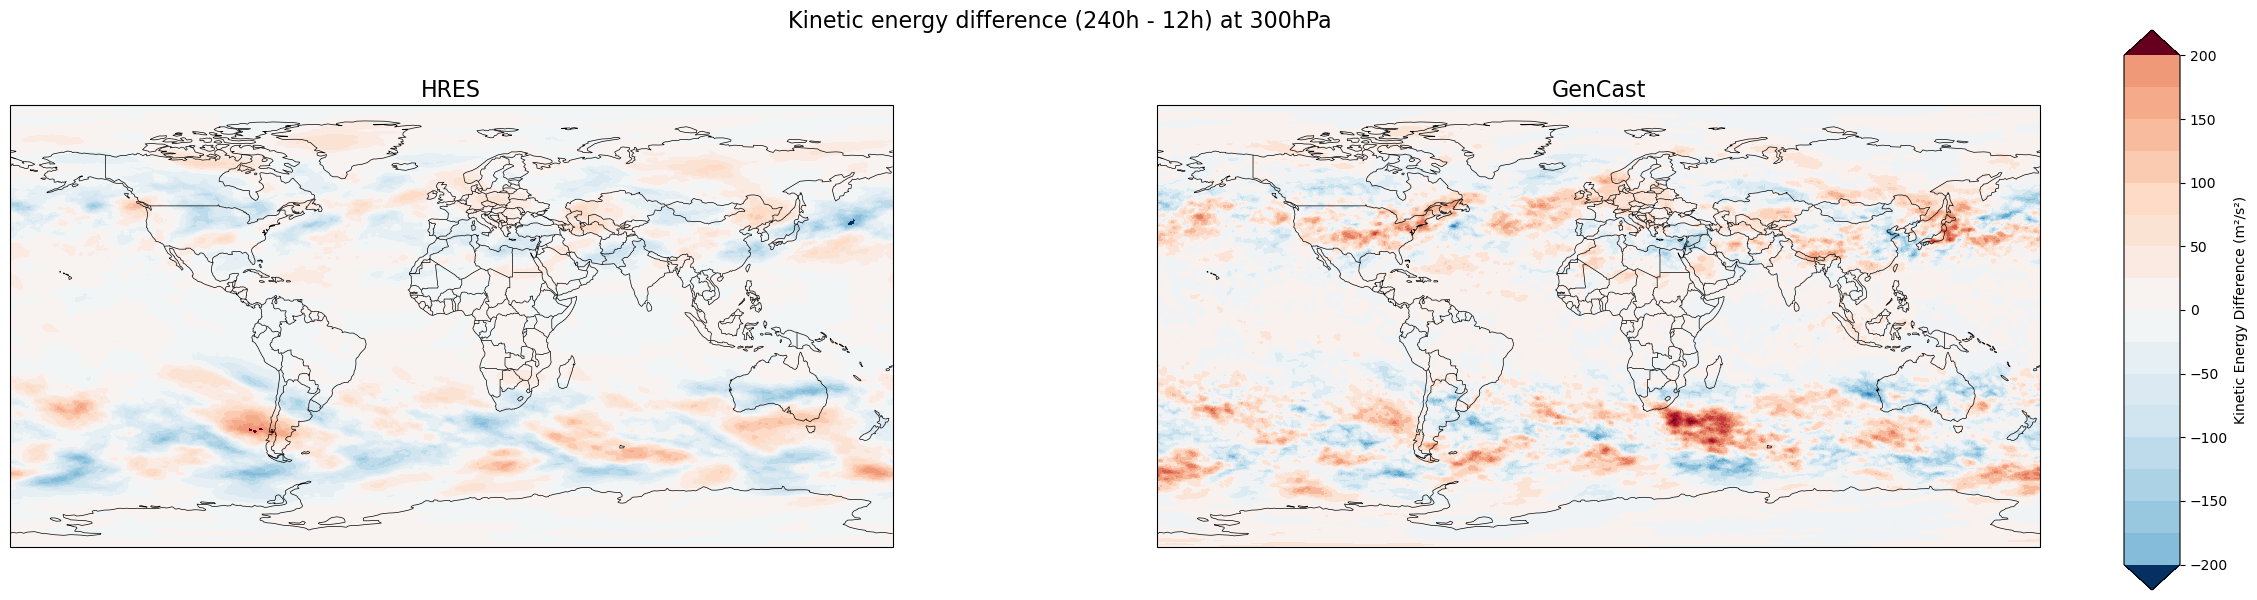

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load HRES data
HRES = xr.open_zarr("/data/GC_output/analysis/NWP/IFS-HRES/2021/uv.zarr")
interval = len(HRES.time) // 20
HRES = HRES.isel(time=slice(2, None, interval))\
    .sel(level=300)\
    .mean("initial_time")

# Calculate kinetic energy for HRES
ke_hres = 0.5 * (HRES['u_component_of_wind']**2 + HRES['v_component_of_wind']**2)

# Load GenCast data
GenCast = xr.open_dataset("/geodata2/Gencast/uv_300hPa.nc")\
    .isel(sample=0, time=slice(0,20))

# Calculate kinetic energy for GenCast
ke_gencast = 0.5 * (GenCast['u_component_of_wind']**2 + GenCast['v_component_of_wind']**2)

# Function to calculate kinetic energy difference
def calculate_ke_diff(ke):
    return ke.isel(time=-1) - ke.isel(time=0)

# Calculate KE differences
ke_diff_hres = calculate_ke_diff(ke_hres)
ke_diff_gencast = calculate_ke_diff(ke_gencast)

# Find global min and max for consistent colorbar
vmax = max(np.abs(ke_diff_hres).max().compute(), np.abs(ke_diff_gencast).max().compute())
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

# Create figure with two subplots, now with a rectangular shape
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 8),
                              subplot_kw={'projection': ccrs.PlateCarree()},
                              gridspec_kw={'wspace': 0.3})  # Add spacing between subplots

# Function to plot kinetic energy difference
def plot_ke_diff(ax, ke_diff, title):
    c = ax.contourf(ke_diff.lon, ke_diff.lat, ke_diff, levels=20, cmap='RdBu_r', norm=norm, extend='both',
                    transform=ccrs.PlateCarree())
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Longitude (degrees)', fontsize=16)
    ax.set_ylabel('Latitude (degrees)', fontsize=16)
    ax.tick_params(labelsize=16)
    ax.grid(True, linestyle='--', alpha=0.5)
    # Add coastlines
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    # Add country borders
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    return c

# Plot HRES
c1 = plot_ke_diff(ax1, ke_diff_hres, 'HRES')

# Plot GenCast
c2 = plot_ke_diff(ax2, ke_diff_gencast, 'GenCast')

# Add main title
fig.suptitle('Kinetic energy difference (240h - 12h) at 300hPa', 
             fontsize=16, 
             y=0.875)

# Adjust layout manually instead of using tight_layout
fig.subplots_adjust(top=0.85,  # Leave space for suptitle
                    right=0.85)  # Leave space for colorbar

# Add colorbar in the space we created
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(c1, cax=cbar_ax, label='Kinetic Energy Difference (m²/s²)')

# plt.savefig("horizontal_300hPa_KE_diff_comparison.png")


In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load HRES data
HRES = xr.open_zarr("/data/GC_output/analysis/NWP/IFS-HRES/2021/uv.zarr")
interval = len(HRES.time) // 20
HRES = HRES.isel(time=slice(2, None, interval)).sel(level=300).mean("initial_time")

# Calculate kinetic energy for HRES
ke_hres = 0.5 * (HRES['u_component_of_wind']**2 + HRES['v_component_of_wind']**2)

# Load GenCast data
GenCast = xr.open_dataset("/geodata2/Gencast/uv_300hPa.nc").isel(sample=0, time=slice(0,20))

# Calculate kinetic energy for GenCast
ke_gencast = 0.5 * (GenCast['u_component_of_wind']**2 + GenCast['v_component_of_wind']**2)

# Create single figure with 6x3 subplots (3x3 for each model)
fig = plt.figure(figsize=(18, 20), dpi=300)
gs = gridspec.GridSpec(6, 3, figure=fig, right=0.85)

# Create axes array with cartopy projection
axes = np.array([[fig.add_subplot(gs[i, j], projection=ccrs.PlateCarree()) for j in range(3)] for i in range(6)])

# Function to plot kinetic energy with finer color scale
def plot_ke(ax, ke, title):
    # Calculate min and max for consistent colorbar
    vmin = float(min(ke.min().compute(), ke_gencast.min().compute()))
    vmax = float(max(ke.max().compute(), ke_gencast.max().compute()))
    
    # Create more levels for finer color scale
    levels = np.linspace(vmin, vmax, 100)
    
    # Create contour plot
    c = ax.contourf(ke.lon, ke.lat, ke, levels=levels, cmap='RdBu_r', extend='max',
                    transform=ccrs.PlateCarree())
    ax.set_title(title)
    
    # Add coastlines and borders using cartopy features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)

    ax.grid(True, linestyle='--', alpha=0.5)
    return c

for i in range(9):
    row = (i // 3) * 2      # 0, 2, 4 → 짝수 row
    col = i % 3
    time_idx = 2 + i * 2    # HRES starts at index 2, every other time step
    ke = ke_hres.isel(time=time_idx)
    c = plot_ke(axes[row, col], ke, f'HRES Day {i+1} 12Z')

for i in range(9):
    row = (i // 3) * 2 + 1  # 1, 3, 5 → 홀수 row
    col = i % 3
    time_idx = i * 2 + 1     
    ke = ke_gencast.isel(time=time_idx)
    c = plot_ke(axes[row, col], ke, f'GenCast Day {i+1} 12Z')


# Add x and y labels
for ax in axes[-1, :]:
    ax.set_xlabel('Longitude (degrees)')
for ax in axes[:, 0]:
    ax.set_ylabel('Latitude (degrees)')

# Add main title
fig.suptitle('300hPa Kinetic Energy Time Series', fontsize=16, y=0.9)

# Add colorbar
cbar_ax = fig.add_axes((0.88, 0.15, 0.02, 0.7))  # Using tuple instead of list
cbar = fig.colorbar(c, cax=cbar_ax, label='Kinetic Energy (m²/s²)')

plt.savefig("300hPa_KE_time_series.png")


### GenCast Family

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature

H_filtered = xr.open_dataset("/geodata2/Gencast/uv_300hPa/H-filtered.nc").isel(ensemble=0)
L_filtered = xr.open_dataset("/geodata2/Gencast/uv_300hPa/L-filtered.nc").isel(ensemble=0)

# Calculate kinetic energy for HRES
ke_H = 0.5 * (H_filtered['u']**2 + H_filtered['v']**2)
ke_L = 0.5 * (L_filtered['u']**2 + L_filtered['v']**2)

# Load GenCast data
GenCast = xr.open_dataset("/geodata2/Gencast/uv_300hPa.nc").isel(sample=0, time=slice(0,20))

# Calculate kinetic energy for GenCast
ke_gencast = 0.5 * (GenCast['u_component_of_wind']**2 + GenCast['v_component_of_wind']**2)

# Create single figure with 6x3 subplots (3x3 for each model)
fig = plt.figure(figsize=(18, 20), dpi=300)
gs = gridspec.GridSpec(9, 3, figure=fig, right=0.85)

# Create axes array with cartopy projection
axes = np.array([[fig.add_subplot(gs[i, j], projection=ccrs.PlateCarree()) for j in range(3)] for i in range(9)])

# Function to plot kinetic energy with finer color scale
def plot_ke(ax, ke, title, is_low_freq=False):
    if is_low_freq:
        # Use separate color scale for low-frequency data
        vmin = float(ke.min().compute())
        vmax = float(ke.max().compute())
    else:
        # Use consistent color scale for total and high-frequency data
        vmin = float(min(ke.min().compute(), ke_gencast.min().compute()))
        vmax = float(max(ke.max().compute(), ke_gencast.max().compute()))
    
    # Create more levels for finer color scale
    levels = np.linspace(vmin, vmax, 100)
    
    # Create contour plot
    c = ax.contourf(ke.lon, ke.lat, ke, levels=levels, cmap='RdBu_r', extend='max',
                    transform=ccrs.PlateCarree())
    ax.set_title(title)
    
    # Add coastlines and borders using cartopy features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)

    ax.grid(True, linestyle='--', alpha=0.5)
    return c

# Plot H-filtered and L-filtered data alternatively
for i in range(9):
    # GenCast row
    row = (i // 3) * 3      # 0, 3, 6
    col = i % 3
    time_idx = i * 2 + 1     
    ke = ke_gencast.isel(time=time_idx)
    c_total = plot_ke(axes[row, col], ke, f'Total KE Day {i+1} 12Z')
    
    # H-filtered row
    row = (i // 3) * 3 + 1  # 1, 4, 7
    ke = ke_H.isel(time=time_idx)
    c_high = plot_ke(axes[row, col], ke, f'High-frequency KE Day {i+1} 12Z')
    
    # L-filtered row
    row = (i // 3) * 3 + 2  # 2, 5, 8
    ke = ke_L.isel(time=time_idx)
    c_low = plot_ke(axes[row, col], ke, f'Low-frequency KE Day {i+1} 12Z', is_low_freq=True)

# Add x and y labels
for ax in axes[-1, :]:
    ax.set_xlabel('Longitude (degrees)')
for ax in axes[:, 0]:
    ax.set_ylabel('Latitude (degrees)')

# Add main title
fig.suptitle('300hPa Kinetic Energy Time Series', fontsize=16, y=0.9)

# Add colorbars
# Colorbar for total and high-frequency data
cbar_ax1 = fig.add_axes((0.88, 0.15, 0.02, 0.7))
cbar1 = fig.colorbar(c_total, cax=cbar_ax1, label='Kinetic Energy (m²/s²)')

# Colorbar for low-frequency data
cbar_ax2 = fig.add_axes((0.92, 0.15, 0.02, 0.7))
cbar2 = fig.colorbar(c_low, cax=cbar_ax2, label='Low-freq KE (m²/s²)')

plt.savefig("GenFam_KE_time_series.png")

# Poster $\to$ Paper

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

# constants
k_400 = 2 * np.pi * 6371229 / 400000

# specify the order exactly as requested - GraphCast 제외하고 3개 모델만
model_order = [
    "HRES", "ENS", "GenCast"  # NWP models + DL model
]

# Initialize global limits
x_min, x_max = np.inf, -np.inf
diff_min, diff_max = np.inf, -np.inf
raw_min, raw_max = np.inf, -np.inf

# 1) First scan data to get global limits
for model in model_order:
    if model == "GenCast":
        data = xr.open_zarr("/geodata2/Gencast/output_spectra.zarr").mean("initial_time").mean("ensemble").compute()
        inp  = xr.open_dataset("/geodata2/S2S/DL/GC_input/2021/spectra.nc")['spectrum'].mean("initial_time")
        x = data['wavenumber'].values
        # 앞에서부터 6개: 0~5
        for t in range(20):
            spc = data['spectrum'].isel(time=t).values
            diff = spc - inp.isel(time=0).values
            diff_min = min(diff_min, np.nanmin(diff))
            diff_max = max(diff_max, np.nanmax(diff))
            raw_min  = min(raw_min,  np.nanmin(spc))
            raw_max  = max(raw_max,  np.nanmax(spc))
        x_min = min(x_min, x[1])
        x_max = max(x_max, x[-1])
        
    elif model == "HRES":
        data = xr.open_zarr("/geodata2/Gencast/HRES_spectra.zarr").mean("initial_time").compute()
        x = data['wavenumber'].values
        data = data['spectrum']
        # 앞에서부터 6개: 1,3,5,7,9,11
        for t in range(1, 21):
            spc = data.isel(time=t).values
            diff = spc - data.isel(time=0).values
            diff_min = min(diff_min, np.nanmin(diff))
            diff_max = max(diff_max, np.nanmax(diff))
            raw_min  = min(raw_min,  np.nanmin(spc))
            raw_max  = max(raw_max,  np.nanmax(spc))
        x_min = min(x_min, x[1])
        x_max = max(x_max, x[-1])
        
    elif model == "ENS":
        data = xr.open_zarr("/geodata2/S2S/DL/GC_output/IFS-ENS/spectra.zarr") \
                  .sel(level=300).mean("initial_time").mean("ensemble").compute()
        x = data['wavenumber'].values
        # 앞에서부터 6개: 1~6
        for t in range(1, 21):
            spc = data['spectrum'].isel(time=t).values
            diff = spc - data['spectrum'].isel(time=0).values
            diff_min = min(diff_min, np.nanmin(diff))
            diff_max = max(diff_max, np.nanmax(diff))
            raw_min  = min(raw_min,  np.nanmin(spc))
            raw_max  = max(raw_max,  np.nanmax(spc))
        x_min = min(x_min, x[1])
        x_max = max(x_max, x[-1])

# 2) Create the plot - 3개 모델이므로 3x2 subplot으로 변경
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
# 6개가 큰 color gradient로 연속적으로 보이도록, seaborn의 'viridis' 팔레트 사용
colors = sns.color_palette('viridis', 20)

# Function to plot a single model
def plot_model(ax_diff, ax_raw, model):
    ax_diff.set_ylim(-10, 10)
    ax_raw.set_ylim(1e-5, 1e3)
    
    if model == "GenCast":
        data = xr.open_zarr("/geodata2/Gencast/output_spectra.zarr").mean("initial_time").mean("ensemble").compute()
        inp  = xr.open_dataset("/geodata2/S2S/DL/GC_input/2021/spectra.nc")['spectrum'].mean("initial_time")
        x = data['wavenumber']
        for t in range(20):
            spc_diff = data['spectrum'].isel(time=t) - inp.isel(time=0)
            idx = np.isfinite(spc_diff)
            ax_diff.plot(x[idx], spc_diff[idx], color=colors[t])
            ax_raw.loglog(x[1:], data['spectrum'].isel(time=t)[1:], color=colors[t], lw=1)

    elif model == "HRES":
        data = xr.open_zarr("/geodata2/Gencast/HRES_spectra.zarr").mean("initial_time").compute()
        x = data['wavenumber']
        data = data['spectrum']
        for i, t in enumerate(range(1, 21)):
            spc = data.isel(time=t) - data.isel(time=0)
            idx = np.where(np.isfinite(spc))
            color_idx = i
            ax_diff.plot(x[idx], spc[idx], color=colors[color_idx])
            ax_raw.loglog(x[1:], data.isel(time=t)[1:], color=colors[color_idx])

    elif model == "ENS":
        data = xr.open_zarr("/geodata2/S2S/DL/GC_output/IFS-ENS/spectra.zarr") \
                  .sel(level=300).mean("initial_time").mean("ensemble").compute()
        x = data['wavenumber']
        for t in range(1, 21):
            spc = data['spectrum'].isel(time=t)
            color_idx = (t - 1)
            ax_diff.plot(x[np.isfinite(spc)], spc[np.isfinite(spc)] - data['spectrum'].isel(time=0)[np.isfinite(spc)], color=colors[color_idx])
            ax_raw.loglog(x[1:], spc[1:], color=colors[color_idx])

    # Common plot settings
    for ax in (ax_diff, ax_raw):
        ax.set_xscale('log')
        ax.axvline(k_400, color='k', ls='--')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    
    ax_diff.set_yscale('symlog', linthresh=1e-3)
    ax_diff.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    

# Plot models vertically - 3개 모델만
for i, model in enumerate(model_order):
    plot_model(axes[i,1], axes[i,0], model)

# panel labels
panel_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for lab, ax in zip(panel_labels, axes.flatten()):
    # 라벨을 y축 라벨 자리에 붙이되, 살짝 위쪽에 배치
    ax.annotate(lab,
                xy=(0, 1.05), xycoords='axes fraction',
                ha='right', va='bottom',
                fontsize=14)
    
# Add labels
for ax in axes[-1, :]:
    ax.set_xlabel("Wavenumber", fontsize=12)
for ax in axes[:, 0]:
    ax.set_ylabel("m²/s²", fontsize=12)

plt.tight_layout()
# plt.savefig("diff_poster.png")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
import pandas as pd

# constants
k_400 = 2 * np.pi * 6371229 / 400000

# specify the order exactly as requested
model_order = [
    "GenCast_0.25 (6-refined)",
    "GenCast_1.0 (5-refined)",
    "GenCast_1.0 Mini (4-refined)"
]

# Create figure with 2x3 layout
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Load all data first
GenCast_0p25 = xr.open_zarr("/geodata2/Gencast/output_spectra.zarr").mean("initial_time").mean("ensemble").compute()
input_0p25 = xr.open_dataset("/geodata2/S2S/DL/GC_input/2021/spectra.nc")['spectrum'].mean("initial_time")

GenCast_1p0 = xr.open_zarr("/geodata2/Gencast/output/2021/spectra.zarr").mean("initial_time").mean("ensemble").compute()
input_1p0 = xr.open_zarr("/geodata2/Gencast/input/2021/spectra.zarr")['spectrum'].mean("initial_time").compute()

GenCast_mini = xr.open_dataset("/geodata2/Gencast/spectra_mini.nc").mean("initial_time").mean("ensemble")
input_mini = xr.open_zarr("/geodata2/Gencast/input/2021/spectra.zarr")['spectrum'].mean("initial_time").compute()

# Calculate SNR for each model
def calculate_snr(data):
    signal = data.mean(dim='time')
    noise = data.std(dim='time')
    return signal / noise

snr_0p25 = calculate_snr(GenCast_0p25['spectrum'])
snr_1p0 = calculate_snr(GenCast_1p0['spectrum'])
snr_mini = calculate_snr(GenCast_mini['spectrum'])

# Calculate moving averages
def calculate_ma(snr, wavenumbers):
    window_size = int(len(wavenumbers) * 0.1)
    window_size = window_size + 1 if window_size % 2 == 0 else window_size
    return pd.Series(snr).rolling(window_size, center=True, min_periods=1).mean().values

snr_0p25_ma = calculate_ma(snr_0p25, GenCast_0p25.wavenumber)
snr_1p0_ma = calculate_ma(snr_1p0, GenCast_1p0.wavenumber)
snr_mini_ma = calculate_ma(snr_mini, GenCast_mini.wavenumber)

# Find knee points
max_idx_0p25 = np.argmax(snr_0p25_ma)
max_idx_1p0 = np.argmax(snr_1p0_ma)
max_idx_mini = np.argmax(snr_mini_ma)

# Plot settings
colors = sns.color_palette('viridis', 30)
model_data = [
    (GenCast_0p25, input_0p25, 89, snr_0p25, snr_0p25_ma, max_idx_0p25),
    (GenCast_1p0, input_1p0, 66, snr_1p0, snr_1p0_ma, max_idx_1p0),
    (GenCast_mini, input_mini, 41, snr_mini, snr_mini_ma, max_idx_mini)
]

# Plot both difference and SNR plots
for i, (data, inp, knee_wavenumber, snr, snr_ma, max_idx) in enumerate(model_data):
    # Difference plot (top row)
    ax_diff = axes[0, i]
    x = data['wavenumber']
    for t in range(30):
        spc_diff = data['spectrum'].isel(time=t) - inp.isel(time=0)
        idx = np.isfinite(spc_diff)
        ax_diff.plot(x[idx], spc_diff[idx], color=colors[t])
    
    ax_diff.axvline(knee_wavenumber, color='red', ls='--', label=f"wavenumber {knee_wavenumber}")
    ax_diff.set_xscale('log')
    ax_diff.set_yscale('symlog', linthresh=1e-3)
    ax_diff.axvline(k_400, color='k', ls='--')
    ax_diff.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax_diff.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    ax_diff.set_title(f"{model_order[i]}", fontsize=16)
    # ax_diff.set_xlabel("Zonal wavenumber", fontsize=16)
    
    # SNR plot (bottom row)
    ax_snr = axes[1, i]
    ax_snr.loglog(x, snr, color='#1f77b4', alpha=0.5)
    ax_snr.loglog(x, snr_ma, label='Moving Average', color='#1f77b4', linewidth=2)
    ax_snr.axvline(x[max_idx].item(), color='red', linestyle='--', 
                  label=f'Wavenumber {x[max_idx].item():.0f}')
    ax_snr.set_xlabel('Zonal Wavenumber', fontsize=16)
    # ax_snr.set_title(f"{model_order[i]} SNR", fontsize=16)
    ax_snr.grid(True, which='both', linestyle='--', alpha=0.7)
    ax_snr.legend()

# Set ylabels
axes[0, 0].set_ylabel("m^2/s^2", fontsize=16)
axes[1, 0].set_ylabel("Signal-to-Noise Ratio", fontsize=16)     

plt.tight_layout()
# plt.savefig("combined_spectra_analysis poster.png")


## Horizontal

In [13]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.style as mpl

mpl.use("fast")

# Load HRES data
HRES = xr.open_zarr("/geodata2/Gencast/HRES_uv.zarr")
interval = len(HRES.time) // 20
HRES = HRES.isel(time=slice(2, None, interval))\
    .sel(level=300)\
    .mean("initial_time")

# Calculate kinetic energy for HRES
ke_hres = 0.5 * (HRES['u_component_of_wind']**2 + HRES['v_component_of_wind']**2)

# Load GenCast data
GenCast = xr.open_dataset("/geodata2/Gencast/uv_300hPa.nc")\
    .isel(sample=0, time=slice(0,20))

# Calculate kinetic energy for GenCast
ke_gencast = 0.5 * (GenCast['u_component_of_wind']**2 + GenCast['v_component_of_wind']**2)

# Function to calculate kinetic energy difference for specific days
def calculate_ke_diff(ke, day):
    return ke.isel(time=day) - ke.isel(time=0)

# Calculate KE differences for days 1, 5, and 9
days = [1, 5, 9]
ke_diff_hres = [calculate_ke_diff(ke_hres, day) for day in days]
ke_diff_gencast = [calculate_ke_diff(ke_gencast, day) for day in days]
# ke_diff = [calculate_ke_diff(ke_gencast, day) for day in days]

# Find global min and max for consistent colorbar
vmax = max(
    max(np.abs(diff).max().compute() for diff in ke_hres),
    max(np.abs(diff).max().compute() for diff in ke_gencast)
)  * 0.8
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)


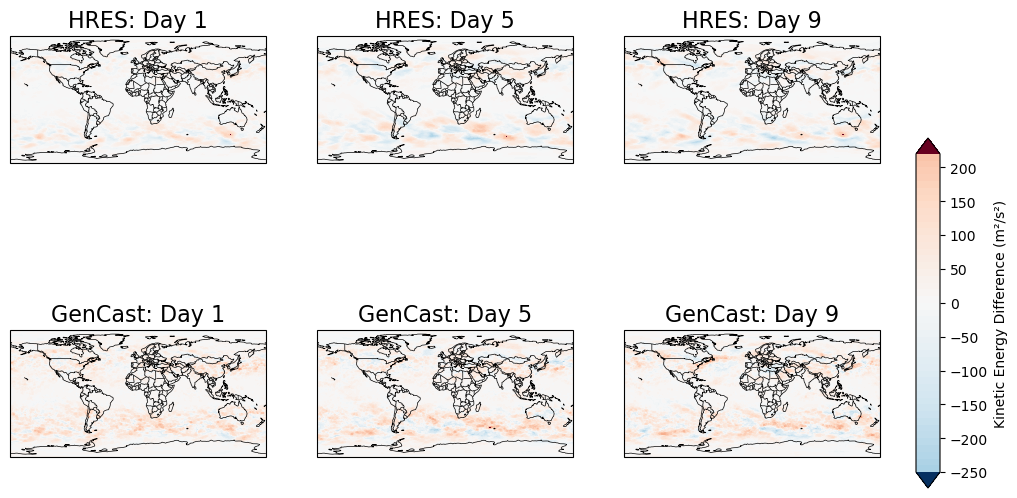

In [17]:

# Create figure with 6 subplots (3 days × 2 models)
fig, axes = plt.subplots(2, 3, figsize=(12, 7),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Function to plot kinetic energy difference
def plot_ke_diff(ax, ke_diff, title):
    c = ax.contourf(ke_diff.lon, ke_diff.lat, ke_diff, levels=25, cmap='RdBu_r', norm=norm, 
                    transform=ccrs.PlateCarree())
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Longitude (degrees)', fontsize=16)
    ax.set_ylabel('Latitude (degrees)', fontsize=16)
    ax.tick_params(labelsize=16)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    return c

# Plot for each day
for i, day in enumerate(days):
    # Plot HRES
    c1 = plot_ke_diff(axes[0, i], ke_diff_hres[i], f'HRES: Day {day}')
    # Plot GenCast
    c2 = plot_ke_diff(axes[1, i], ke_diff_gencast[i], f'GenCast: Day {day}')
    # c3 = plot_ke_diff(axes[2, i], ke_diff[i], f'GenCast-HRES: Day {day}')

# Add main title
# fig.suptitle('Kinetic energy at 300hPa', 
#              fontsize=16, 
#              y=0.95)  

# Adjust layout manually
fig.subplots_adjust(#top=0.9,  # Leave space for suptitle
                    right=0.85)  # Leave space for colorbar

# Add colorbar
cbar_ax = fig.add_axes([0.88, 0.2, 0.02, 0.5])
cbar = fig.colorbar(c1, cax=cbar_ax, label='Kinetic Energy Difference (m²/s²)')

plt.savefig("horizontal_300hPa_KE_diff_comparison.png")


## Vertical


In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Load HRES data
HRES = xr.open_zarr("/geodata2/Gencast/HRES_uv.zarr")
interval = len(HRES.time) // 20
HRES = HRES.isel(time=slice(2, None, interval)).mean("initial_time").mean("lon")

# Calculate kinetic energy for HRES
ke_hres = 0.5 * (HRES['u_component_of_wind']**2 + HRES['v_component_of_wind']**2)

# Load GenCast data
GenCast = xr.open_dataset("/geodata2/Gencast/uv_mean.nc").isel(sample=0, time=slice(0,20)).mean("initial_time")

# Calculate kinetic energy for GenCast
ke_gencast = 0.5 * (GenCast['u_component_of_wind']**2 + GenCast['v_component_of_wind']**2)

# Create figure with 3x3 subplots and adjust for colorbar
fig = plt.figure(figsize=(12.5, 8.5))  # Adjusted figure size
gs = plt.GridSpec(3, 3, figure=fig, right=0.88)  # Adjusted grid for 3 days
axes = np.array([[fig.add_subplot(gs[i, j]) for j in range(3)] for i in range(3)])

# Function to plot kinetic energy with finer color scale
def plot_ke(ax, ke, title, extend='max'):
    # Calculate min and max for consistent colorbar
    vmin = min(ke.min().compute(), ke_gencast.min().compute())
    vmax = max(ke.max().compute(), ke_gencast.max().compute())
    
    # Create more levels for finer color scale
    levels = np.linspace(vmin, vmax, 100)
    
    c = ax.contourf(ke.lat, ke.level, ke, levels=levels, cmap='YlGnBu_r', extend=extend)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("")
    ax.invert_yaxis()
    ax.grid(True, linestyle='--', alpha=0.5)
    return c

# Function to plot kinetic energy difference with separate color scale
def plot_ke_diff(ax, ke_diff, title, norm):

    c = ax.contourf(ke_diff.lat, ke_diff.level, ke_diff, levels=120, cmap='RdBu_r', extend='both', norm=norm)
    ax.set_title(title, fontsize=16)
    ax.invert_yaxis()
    ax.grid(True, linestyle='--', alpha=0.5)
    return c

# Days to plot (1, 5, and 9)
days = [0, 4, 8]  # 0-based indices for days 1, 5, and 9

# Plot HRES (first row)
for i, day in enumerate(days):
    time_idx = 2 + day * 2  # HRES starts at index 2, every other time step
    ke = ke_hres.isel(time=time_idx).transpose('level', 'lat')
    c = plot_ke(axes[0, i], ke, f'HRES Day {day+1} 12Z')

# Plot GenCast (second row)
for i, day in enumerate(days):
    time_idx = day * 2 + 1  # GenCast starts at index 0, every other time step
    ke = ke_gencast.isel(time=time_idx).transpose('level', 'lat')
    c = plot_ke(axes[1, i], ke, f'GenCast Day {day+1} 12Z')

# Plot differences (third row)
ke_diff  = ke_hres - ke_gencast
vmax = max([abs(ke_diff.min().compute()), abs(ke_diff.max().compute())])
norm_diff = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

for i, day in enumerate(days):
    ke_diff = ke_hres.isel(time=2+day*2) - ke_gencast.isel(time=day*2+1)
    c_diff = plot_ke_diff(axes[2, i], ke_diff, f'HRES-GenCast Day {day+1} 12Z', norm_diff)

for row in (0, 1):
    axes[row, 0].tick_params(
            bottom=False, labelbottom=False   # x-축 숫자 안 보이게
        )
    for col in range(1, 3):
        axes[row, col].tick_params(
            bottom=False, labelbottom=False,   # x-축 숫자 안 보이게
            left=False,  labelleft=False       # y-축 숫자 안 보이게
        )

# Add x and y labels

axes[2,1].set_xlabel('Latitude (degrees)', fontsize=16)

axes[1,0].set_ylabel('Pressure Level (hPa)', fontsize=16)

# Add main title
# fig.suptitle('Cross-sectional Kinetic Energy Time Series', 
#              fontsize=20, 
#              y=0.95)

# Add colorbars in the space we reserved
# Colorbar for HRES and GenCast plots
cbar_ax1 = fig.add_axes([0.92, 0.43, 0.02, 0.4])  # Adjusted position
cbar1 = fig.colorbar(c, cax=cbar_ax1, label='Kinetic Energy (m²/s²)')

# Colorbar for difference plots
cbar_ax2 = fig.add_axes([0.92, 0.1, 0.02, 0.25])  # Adjusted position
cbar2 = fig.colorbar(c_diff, cax=cbar_ax2, label='Kinetic Energy Difference (m²/s²)')

plt.savefig("cross-sectional_KE_time_series poster.png", dpi=300, bbox_inches='tight')


## Fourier


In [ ]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs

# ---------------------------------------------------------------------------
# I/O & config
# ---------------------------------------------------------------------------
thr=100
components = {"low":  f"k≤{thr}",
              "high": f"k>{thr}"}
models = ["GraphCast", "GenCast"]  # order matters for plotting
k_thr = 100                                         # keep this in sync

# ---------------------------------------------------------------------------
# helper: plotting wrapper
# ---------------------------------------------------------------------------
def pcol(ax, da, norm, cmap, title):
    """Contour-fill a DataArray on PlateCarree."""
    im = ax.contourf(da.lon, da.lat, da, levels=60,
                     cmap=cmap, norm=norm, extend="both",
                     transform=ccrs.PlateCarree())
    ax.set_title(title, fontsize=15)
    ax.coastlines(linewidth=0.4)
    ax.set_xticks([]); ax.set_yticks([])
    return im

# ---------------------------------------------------------------------------
# 1. load all fields
# ---------------------------------------------------------------------------
varmap = {"GraphCast": "ke_graph",
          "GenCast": "ke_gen"}

ds = xr.open_dataset("ke_fourier.nc")   # 한 번에 열기


fields = {
    mdl: {cmp: ds[f"{varmap[mdl]}_{cmp}"] for cmp in components}   # low/high
    for mdl in models
}

# ---------------------------------------------------------------------------
# 2. colour-scale limits
# ---------------------------------------------------------------------------
low_max  = max(abs(fields[m]["low"]).max()  for m in models) * 0.8
high_max = max(abs(fields[m]["high"]).max() for m in models) * 0.5

norms = {"low":  TwoSlopeNorm(vmin=-low_max, vcenter=0, vmax=low_max),
         "high": TwoSlopeNorm(vmin=-high_max, vcenter=0, vmax=high_max)}
cmap  = "RdBu_r"  # diverging colormap

# ---------------------------------------------------------------------------
# 3. figure & axes
# ---------------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 9),
                         subplot_kw={"projection": ccrs.PlateCarree()},
                         gridspec_kw={"wspace": .2, "hspace": .2})
axes = axes.reshape(2, 2)   # [model idx, 0/1] convenience

for i, mdl in enumerate(models):
    for j, cmp in enumerate(components):   # cmp = "low" / "high"
        title = f"{mdl} {components[cmp]}"
        pcol(axes[i, j], fields[mdl][cmp], norms[cmp], cmap, title)

# ---------------------------------------------------------------------------
# 4. COLOUR-BARS
# ---------------------------------------------------------------------------
def add_cbar(norm, bbox, label=None):
    cax = fig.add_axes(bbox)
    fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
                 cax=cax, label=label)

add_cbar(norms["low"],  [0.51, 0.25, 0.01, 0.5])
add_cbar(norms["high"], [0.94, 0.25, 0.01, 0.5],
         label="KE (m$^2$ s$^{-2}$)")

# ---------------------------------------------------------------------------
# 5. save
# ---------------------------------------------------------------------------
plt.savefig("KE_fourier.png", dpi=300, bbox_inches="tight")
print("✅ Figure saved → day1_KE_decomp.png")


In [ ]:

import xarray as xr
print(xr.open_dataset("/geodata2/Gencast/fourier_1.nc").data_vars)

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Day-1 KE comparison (HRES / GraphCast / GenCast) + spectral split plotting.
author: you 😎
"""

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

# ---------------------------------------------------------------------------
# Helper functions (same as before, excluding data loading/processing)
# ---------------------------------------------------------------------------
def pcol(ax, field, norm, cmap, title):
    """common plot wrapper"""
    im = ax.contourf(
        field.lon, field.lat, field,
        levels=60, cmap=cmap, norm=norm, extend="both",
        transform=ccrs.PlateCarree()
    )
    ax.set_title(title, fontsize=16)
    ax.coastlines(linewidth=0.4)
    ax.set_xticks([])
    ax.set_yticks([])
    return im

# ---------------------------------------------------------------------------
# Main plotting logic
# ---------------------------------------------------------------------------
cache_dir = "cache"
k_thr = 100 # Ensure this matches the k_thr used during data processing

# 1. Load data from cache
print("🔄 Loading cached data for plotting...")
try:
    ds = xr.open_dataset("/geodata2/Gencast/fourier_1.nc")

    # ke_hres        (lat, lon) float32 ...
    # ke_graph       (lat, lon) float32 ...
    # ke_gen         (lat, lon) float32 ...
    # ke_hres_low    (lat, lon) float64 ...
    # ke_hres_high   (lat, lon) float64 ...
    # ke_genc_low    (lat, lon) float64 ...
    # ke_genc_high   (lat, lon) float64 ...
    # ke_graph_low   (lat, lon) float64 ...
    # ke_graph_high  (lat, lon) float64 ...

    # ke_hres = xr.open_dataarray(os.path.join(cache_dir, "ke_hres.nc"))
    # ke_gc = xr.open_dataarray(os.path.join(cache_dir, "ke_gc.nc"))
    # ke_genc = xr.open_dataarray(os.path.join(cache_dir, "ke_genc.nc"))

    ke_hres_low = ds.ke_hres_low
    ke_gc_low = ds.ke_graph_low
    ke_genc_low = ds.ke_genc_low

    ke_hres_high = ds.ke_hres_high
    ke_gc_high = ds.ke_graph_high
    ke_genc_high = ds.ke_genc_high

    print("✅ Cached data loaded successfully.")
except FileNotFoundError:
    print(f"❌ Error: Cache files not found in '{cache_dir}'. Please run 'process_and_cache_data.py' first.")
    exit()

# Calculate differences (these are light computations, can be done here)
# gc_minus_h = (ke_gc - ke_hres).load()
# genc_minus_h = (ke_genc - ke_hres).load()

# 2. Colour scales
from multiprocessing import Pool

def get_max_abs(data):
    return abs(data).max().item()

def get_max(data):
    return data.max().item()

from matplotlib.colors import PowerNorm

# Create a pool of workers
with Pool() as pool:
    # Calculate diff max
    # diff_maxes = pool.map(get_max_abs, [gc_minus_h, genc_minus_h])
    # diff_max = max(diff_maxes)
    # diff_norm = TwoSlopeNorm(vmin=-diff_max, vcenter=0, vmax=diff_max)

    # Calculate high/low maxes
    # high_maxes = pool.map(get_max_abs, [ke_hres_high, ke_gc_high, ke_genc_high])
    # low_maxes = pool.map(get_max_abs, [ke_hres_low, ke_gc_low, ke_genc_low])
    
    # high_max = max(high_maxes) * 0.5
    # low_max = max(low_maxes)

    high_norm = PowerNorm(gamma=0.5, vmin=0, vmax=45) 
    low_norm = plt.Normalize(0, 650)

fig, gs = plt.subplots(3, 2,
                       figsize=(12, 9),
    subplot_kw={'projection': ccrs.PlateCarree()},
    gridspec_kw={'wspace': 0.2, 'hspace' : 0.2}   #   열 간격도 살짝
)
# ax_HRES_raw = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax_HRES_low = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax_HRES_high = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())

# ax_GC_raw = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax_GC_low = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree()) # Moved to new row
ax_GC_high = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree()) # Moved to new row

# ax_GE_raw = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree())
ax_GE_low = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree()) # Moved to new row
ax_GE_high = fig.add_subplot(gs[2, 1], projection=ccrs.PlateCarree()) # Moved to new row

# GraphCast rows
# pcol(ax_GC_raw, gc_minus_h, diff_norm, "RdBu_r", "GraphCast – HRES")
pcol(ax_GC_low, ke_gc_low, low_norm, "YlGnBu_r", f"GraphCast k≤{k_thr}")
pcol(ax_GC_high, ke_gc_high, high_norm, "YlGnBu_r", f"GraphCast k>{k_thr}")

# GenCast rows
# pcol(ax_GE_raw, genc_minus_h, diff_norm, "RdBu_r", "GenCast – HRES")
pcol(ax_GE_low, ke_genc_low, low_norm, "YlGnBu_r", f"GenCast k≤{k_thr}")
pcol(ax_GE_high, ke_genc_high, high_norm, "YlGnBu_r", f"GenCast k>{k_thr}")

# HRES rows
# pcol(ax_HRES_raw, ke_hres, diff_norm, "RdBu_r", "HRES")
pcol(ax_HRES_low, ke_hres_low, low_norm, "YlGnBu_r", f"HRES k≤{k_thr}")
pcol(ax_HRES_high, ke_hres_high, high_norm, "YlGnBu_r", f"HRES k>{k_thr}")

# 5. Colour-bars (one for raw, one for diff, one for low-k, one for high-k)
# cax_raw = fig.add_axes([0.35, 0.25, 0.01, 0.5]) # Adjusted position
# fig.colorbar(
#     plt.cm.ScalarMappable(norm=diff_norm, cmap="RdBu_r"),
#     cax=cax_raw
# )

cax_low = fig.add_axes([0.49, 0.25, 0.01, 0.5]) # Adjusted position and size
fig.colorbar(
    plt.cm.ScalarMappable(norm=low_norm, cmap="YlGnBu_r"),
    cax=cax_low
)

cax_high = fig.add_axes([0.91, 0.25, 0.01, 0.5]) # Adjusted position and size
fig.colorbar(
    plt.cm.ScalarMappable(norm=high_norm, cmap="YlGnBu_r"),
    cax=cax_high, label="KE (m$^2$ s$^{-2}$)"
)


# 6. Save
plt.savefig("day1_fourier.png", dpi=300, bbox_inches="tight")
print("✅ Figure saved → day1_KE_decomp.png")

In [ ]:
import matplotlib
matplotlib.use("Agg")

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, PowerNorm
import cartopy.crs as ccrs

# ---------------------------------------------------------------------------
# Configuration
# ---------------------------------------------------------------------------
cache_path = "/geodata2/Gencast/fourier_ens_mean_d1_12z.nc"
output_path = "/home/hiskim1/fourier_ens_mean_d1_12z.png"
k_thr = 100

# ---------------------------------------------------------------------------
# Load and preprocess data
# ---------------------------------------------------------------------------
print("🔄 Loading data into memory...")
ds = xr.open_dataset(cache_path).load()
print("✅ Data loaded.")

# Extract KE components
ke_hres_low  = ds.ke_hres_low
ke_ens_low   = ds.ke_ens_low
ke_genc_low  = ds.ke_genc_low
ke_hres_high = ds.ke_hres_high
ke_ens_high  = ds.ke_ens_high
ke_genc_high = ds.ke_genc_high

# ---------------------------------------------------------------------------
# Set up color norms
# ---------------------------------------------------------------------------
low_norm  = Normalize(vmin=0,   vmax=650)
high_norm = PowerNorm(gamma=0.5, vmin=0, vmax=60)

# ---------------------------------------------------------------------------
# Precompute meshgrid for faster plotting
# ---------------------------------------------------------------------------
lon2d, lat2d = np.meshgrid(ds.lon, ds.lat)

# ---------------------------------------------------------------------------
# Create figure and axes
# ---------------------------------------------------------------------------
fig, axes = plt.subplots(
    3, 2,
    figsize=(12, 9),
    subplot_kw={'projection': ccrs.PlateCarree()},
    gridspec_kw={'wspace': 0.2, 'hspace': 0.2}
)
ax_hres_low,  ax_hres_high  = axes[0]
ax_ens_low,   ax_ens_high   = axes[1]
ax_genc_low,  ax_genc_high  = axes[2]

# ---------------------------------------------------------------------------
# Plot helper using pcolormesh
# ---------------------------------------------------------------------------
def mesh_plot(ax, data, norm, title):
    im = ax.pcolormesh(
        lon2d, lat2d, data.values,
        norm=norm, cmap="YlGnBu_r",
        transform=ccrs.PlateCarree()
    )
    ax.set_title(title, fontsize=16)
    ax.coastlines(linewidth=0.4)
    ax.set_xticks([])
    ax.set_yticks([])
    return im

# ---------------------------------------------------------------------------
# Plot panels
# ---------------------------------------------------------------------------
mesh_plot(ax_ens_low,  ke_ens_low,  low_norm,  f"IFS-ENS k≤{k_thr}")
mesh_plot(ax_ens_high, ke_ens_high, high_norm, f"IFS-ENS k>{k_thr}")
mesh_plot(ax_genc_low, ke_genc_low, low_norm,  f"GenCast k≤{k_thr}")
mesh_plot(ax_genc_high,ke_genc_high, high_norm, f"GenCast k>{k_thr}")
mesh_plot(ax_hres_low, ke_hres_low, low_norm,  f"HRES k≤{k_thr}")
mesh_plot(ax_hres_high,ke_hres_high,high_norm, f"HRES k>{k_thr}")

# ---------------------------------------------------------------------------
# Colorbars
# ---------------------------------------------------------------------------
cax_low  = fig.add_axes([0.49, 0.25, 0.01, 0.5])
fig.colorbar(
    plt.cm.ScalarMappable(norm=low_norm, cmap="YlGnBu_r"),
    cax=cax_low
)
cax_high = fig.add_axes([0.91, 0.25, 0.01, 0.5])
fig.colorbar(
    plt.cm.ScalarMappable(norm=high_norm, cmap="YlGnBu_r"),
    cax=cax_high,
    label="KE (m$^2$ s$^{-2}$)"
)

# ---------------------------------------------------------------------------
# Save figure
# ---------------------------------------------------------------------------
plt.savefig(output_path, dpi=300, bbox_inches="tight")
print(f"✅ Figure saved → {output_path}")


In [ ]:
import xarray as xr
import numpy as np

def kinetic_energy(ds):
    """0.5*(u²+v²) – keeps original coords & attrs."""
    return 0.5 * (ds["u"] ** 2 + ds["v"] ** 2)

def fft_split_lon(da, k_thr, part="low"):
    """
    Longitude-wise FFT filter.
      part = "low"  → |k| <= k_thr kept
      part = "high" → |k| > k_thr kept
    """
    lon_dim = da.dims[-1]
    n_lon   = da.sizes[lon_dim]
    k_idx   = np.fft.fftfreq(n_lon) * n_lon
    keep    = np.abs(k_idx) <= k_thr if part == "low" else np.abs(k_idx) > k_thr

    fft_arr = np.fft.fft(da, axis=-1)
    fft_arr[..., ~keep] = 0
    filtered = np.fft.ifft(fft_arr, axis=-1).real

    return xr.DataArray(
        filtered, coords=da.coords, dims=da.dims,
        name=f"{da.name}_k{'le' if part=='low' else 'gt'}{k_thr}"
    )


HRES = xr.open_zarr("/geodata2/Gencast/HRES_uv.zarr")\
        .sel(level=300)\
            .mean("initial_time")\
                .isel(time=4)\
                .rename({"u_component_of_wind":"u", "v_component_of_wind":"v"})

# d-0 12z부터 시작 / t_1이 d-1 00z
ENS = xr.open_dataset("/geodata2/S2S/DL/GC_output/IFS-ENS/uv300hPa.nc", chunks={"lat":1440, "lon":721})\
    .isel(time=2).mean(dim="ensemble")
        
# d-1 00z부터 시작
GenCast = xr.open_dataset("/geodata2/Gencast/uv_300hPa.nc", chunks={"lat":1440, "lon":721})\
    .isel(time=1).mean(dim="sample")\
    .rename({"u_component_of_wind":"u", "v_component_of_wind":"v"})


HRES = kinetic_energy(HRES)
ENS = kinetic_energy(ENS)
GenCast = kinetic_energy(GenCast)

k_thr = 100

HRES_high = fft_split_lon(HRES.compute(), k_thr, "high")
HRES_low = fft_split_lon(HRES.compute(), k_thr, "low")

gen_high = fft_split_lon(GenCast.compute(), k_thr, "high")
gen_low = fft_split_lon(GenCast.compute(), k_thr, "low")

ens_high = fft_split_lon(ENS.compute(), k_thr, "high")
ens_low = fft_split_lon(ENS.compute(), k_thr, "low")

HRES_high.name = "ke_hres_high"
HRES_low.name = "ke_hres_low"

gen_high.name = "ke_gen_high"
gen_low.name = "ke_gen_low"

ens_high.name = "ke_ens_high"
ens_low.name = "ke_ens_low"

ds = xr.Dataset({
    "ke_hres": HRES,
    "ke_ens": ENS,
    "ke_gen": GenCast,
    "ke_hres_low": HRES_low,
    "ke_hres_high": HRES_high,
    "ke_genc_low": gen_low,
    "ke_genc_high": gen_high,
    "ke_ens_low": ens_low,
    "ke_ens_high": ens_high
}, coords={
    "lat": HRES.lat,
    "lon": HRES.lon
})

ds.to_netcdf("/geodata2/Gencast/fourier_ens_mean_d1_12z.nc")